# 獨立成分分析(Independent Component Analysis)

##### 先引入我們需要的packages

In [1]:
import os 
import numpy as np
import matplotlib.pyplot as plt
from numpy import random
from tqdm.notebook import tqdm
from random import choices
from scipy import signal

# Dataset

[[0.5 1.  0.5]
 [1.  1.  1.5]
 [0.5 1.5 0.5]]


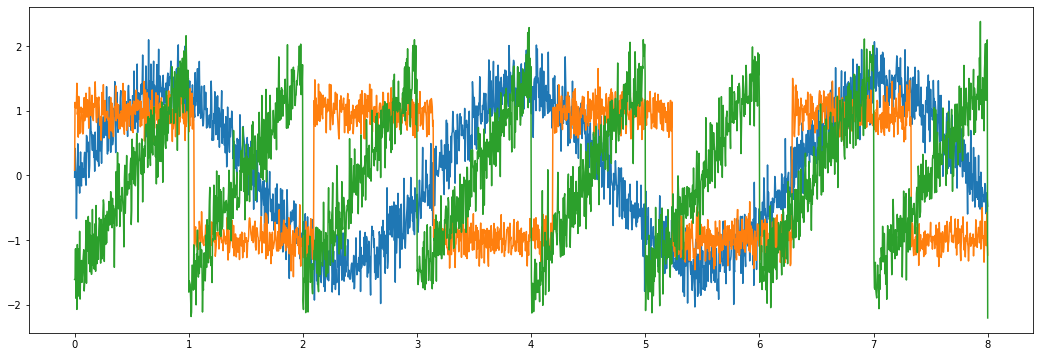

In [2]:
np.random.seed(0)
m=2000
n=3
time = np.linspace(0, 8, m)
A=np.random.randint(1,4,(n,n))/2
print(A)
X_ori=np.zeros((m,n))
X_ori[:,0] = np.sin(2 *time) 
X_ori[:,1] = np.sign(np.sin(3 * time))  
X_ori[:,2] = signal.sawtooth(2 * np.pi * time)
X_ori += 0.2 * np.random.normal(size=X_ori.shape) 
X_ori/=X_ori.std(axis=0) 
X=np.dot(A,X_ori.T)
plt.rcParams["figure.figsize"] = (18,6)
for i in range(0,3):
    plt.plot(time,X_ori[:,i])
plt.show()

# Mixed Signal

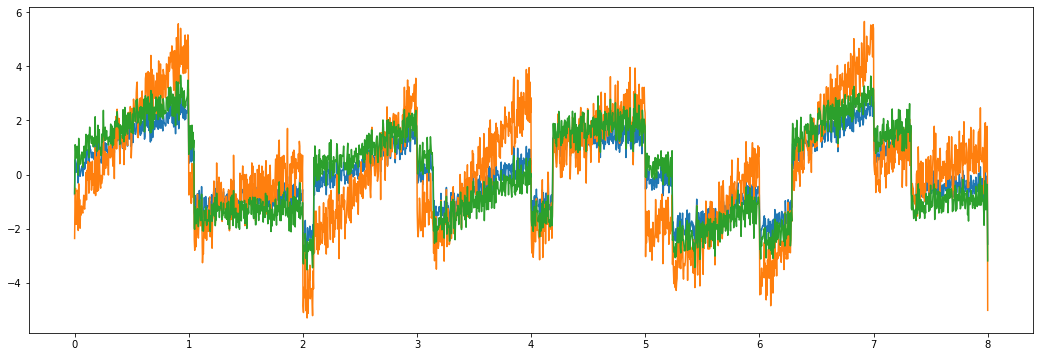

In [3]:
plt.rcParams["figure.figsize"] = (18,6)
for i in range(0,3):
    plt.plot(time,X[i,:])
plt.show()

# ICA

In [4]:
C=3
X_mean=np.mean(X,axis=1)
X_norm=X-X_mean[:,None]
u, d, _ = np.linalg.svd(X_norm, full_matrices=False)
K = (u/d).T[:C]
Z = np.dot(K, X)*np.sqrt(m)
W = np.zeros((C,n))*0.5
for p in range(0,C):
    wp = np.ones((n,1))*0.5
    wp = wp/np.sqrt(np.dot(wp.T,wp))
    for i in range(0,1000):
        G=np.tanh(np.dot(wp.T,Z))
        Gder=1-np.tanh(np.dot(wp.T,Z))**2
        wp = np.dot(Z,G.T)/m-np.dot(Gder,np.ones((m,1)))*wp/m
        dumsum = np.zeros((C,1))
        for j in range(0,p):
            dumsum += (np.dot(wp.T,W[:,j])*W[:,j]).reshape(n,1)        
        wp = wp-dumsum
        wp = wp/np.sqrt(np.dot(wp.T,wp))
    W[:,p]=wp.flatten()
W/=np.sqrt(2)
S=np.dot(W.T,Z)

# PLOT

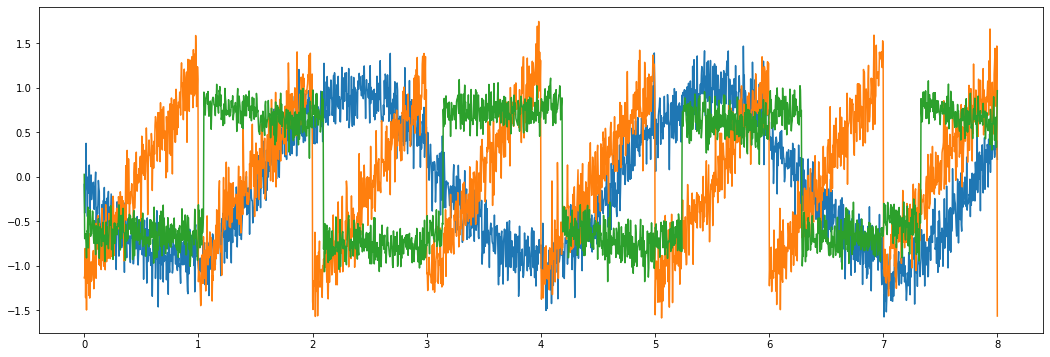

In [5]:
plt.rcParams["figure.figsize"] = (18,6)
plt.plot(time,S[0,:])
plt.plot(time,S[1,:])
plt.plot(time,S[2,:])
plt.show()